**Лабораторная работа №1 (01-TrainTestSplitBase)**




In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Загрузка и подготовка данных
def load_spam_data():
    # URL датасета
    data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
    names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

    # Загрузка названий признаков
    with pd.option_context('display.max_colwidth', 100):
        names = pd.read_csv(names_url, skiprows=32, sep=':', header=None,
                          names=['feature', 'description'])

    # Создание списка названий столбцов
    feature_names = names['feature'].str.strip().tolist()
    feature_names.append('spam')  # добавляем целевой столбец

    # Загрузка данных
    spam_data = pd.read_csv(data_url, header=None, names=feature_names)
    return spam_data

# Загрузка данных
spam_data = load_spam_data()


Распределение классов:
Не спам (0): 60.60%
Спам (1): 39.40%


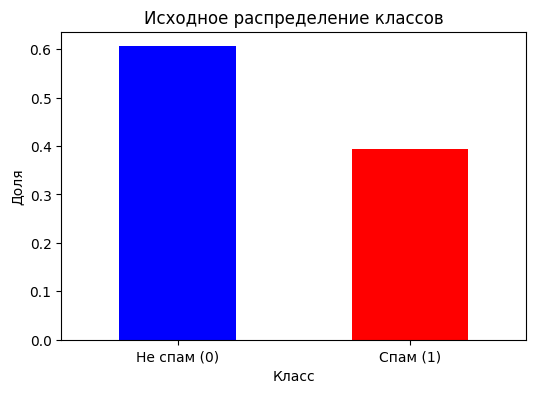

In [ ]:
# 2. Анализ исходного распределения классов
def analyze_class_distribution(y):
    distribution = y.value_counts(normalize=True)
    print("\nРаспределение классов:")
    print(f"Не спам (0): {distribution[0]:.2%}")
    print(f"Спам (1): {distribution[1]:.2%}")

    plt.figure(figsize=(6, 4))
    distribution.plot(kind='bar', color=['blue', 'red'])
    plt.title('Исходное распределение классов')
    plt.xlabel('Класс')
    plt.ylabel('Доля')
    plt.xticks([0, 1], ['Не спам (0)', 'Спам (1)'], rotation=0)
    plt.show()

analyze_class_distribution(spam_data['spam'])

In [ ]:
# 3. Разбиение на обучающую и тестовую выборки
def split_data(X, y, test_size, random_state=42):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size,
                               random_state=random_state)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    return X_train, X_test, y_train, y_test

# Подготовка данных
X = spam_data.drop('spam', axis=1)
y = spam_data['spam']

# Разбиение 80/20
X_train_80, X_test_80, y_train_80, y_test_80 = split_data(X, y, test_size=0.2)

# Разбиение 70/30
X_train_70, X_test_70, y_train_70, y_test_70 = split_data(X, y, test_size=0.3)

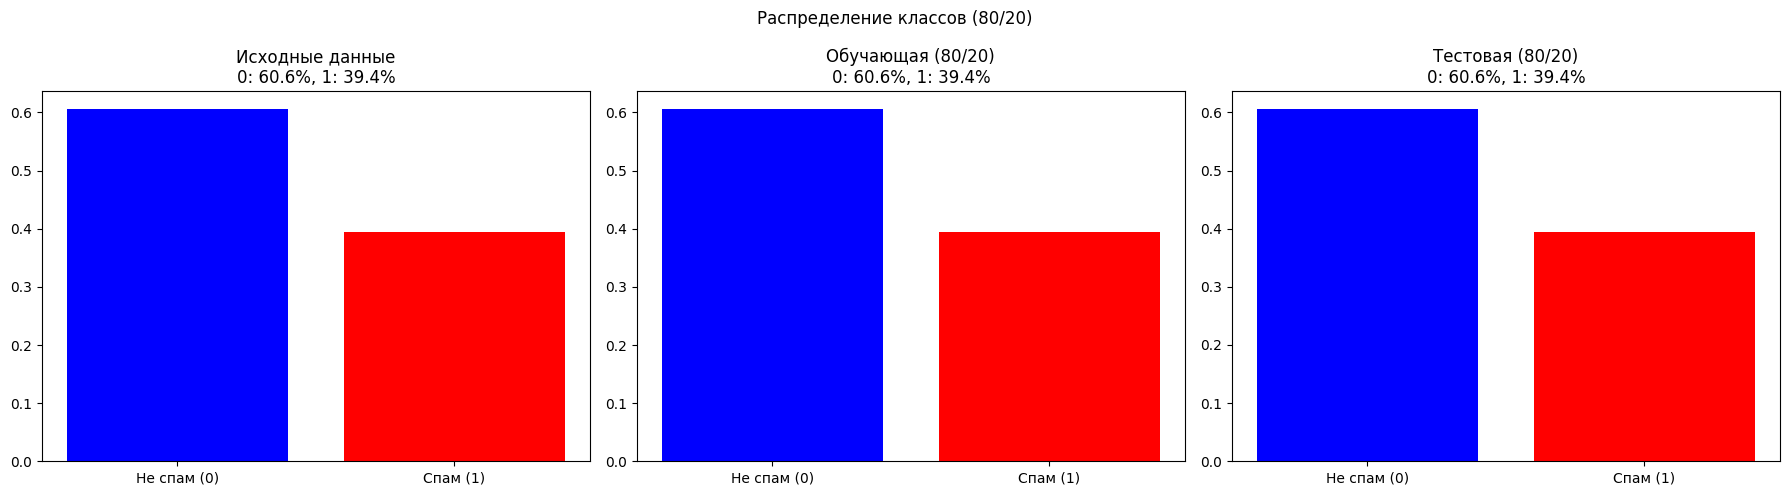

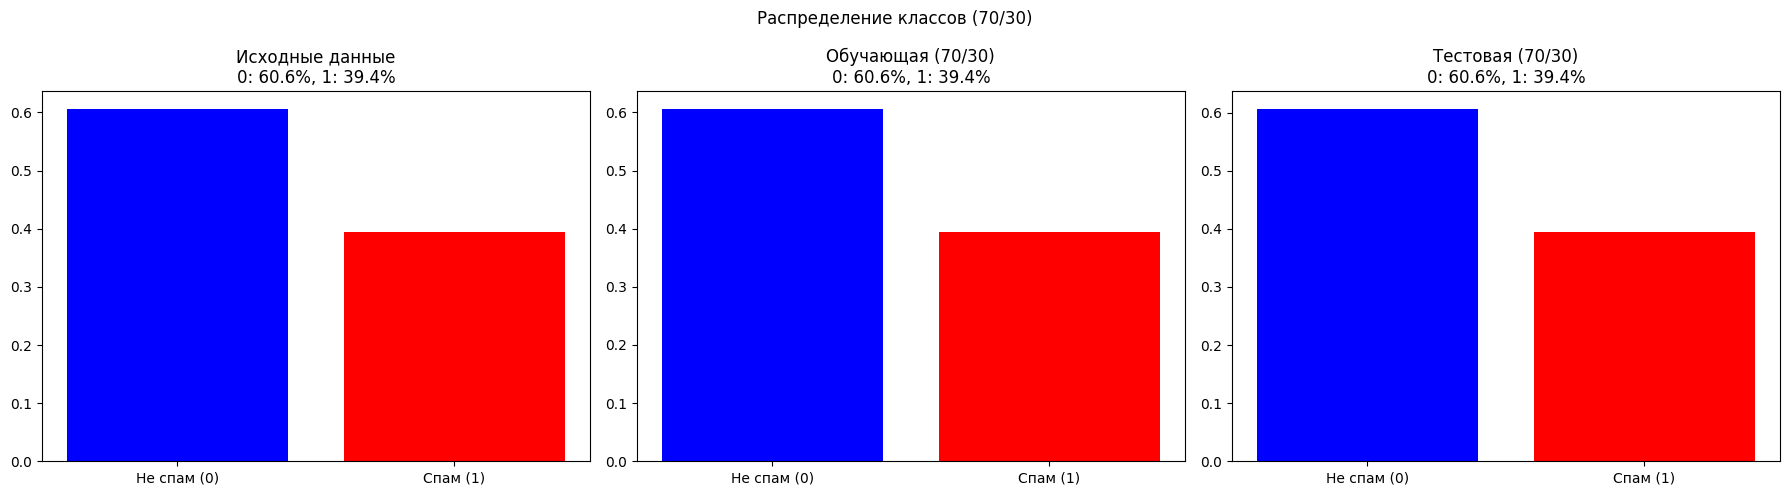

In [ ]:
# 4. Визуализация сохранения баланса после разбиения
def plot_split_comparison(y, y_train, y_test, split_name):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Исходные данные
    orig_counts = y.value_counts(normalize=True).values
    ax1.bar(['Не спам (0)', 'Спам (1)'], orig_counts, color=['blue', 'red'])
    ax1.set_title(f'Исходные данные\n0: {orig_counts[0]:.1%}, 1: {orig_counts[1]:.1%}')

    # Обучающая выборка
    train_counts = y_train.value_counts(normalize=True).values
    ax2.bar(['Не спам (0)', 'Спам (1)'], train_counts, color=['blue', 'red'])
    ax2.set_title(f'Обучающая ({split_name})\n0: {train_counts[0]:.1%}, 1: {train_counts[1]:.1%}')

    # Тестовая выборка
    test_counts = y_test.value_counts(normalize=True).values
    ax3.bar(['Не спам (0)', 'Спам (1)'], test_counts, color=['blue', 'red'])
    ax3.set_title(f'Тестовая ({split_name})\n0: {test_counts[0]:.1%}, 1: {test_counts[1]:.1%}')

    plt.suptitle(f'Распределение классов ({split_name})')
    plt.tight_layout()
    plt.show()

# Визуализация для 80/20
plot_split_comparison(y, y_train_80, y_test_80, '80/20')

# Визуализация для 70/30
plot_split_comparison(y, y_train_70, y_test_70, '70/30')

In [ ]:
# 5. Проверка размеров выборок
def print_split_stats(y_train, y_test, split_name):
    print(f"\nСтатистика разбиения {split_name}:")
    print(f"Обучающая выборка: {len(y_train)} примеров ({len(y_train)/len(y):.1%})")
    print(f"Тестовая выборка: {len(y_test)} примеров ({len(y_test)/len(y):.1%})")
    print("\nРаспределение в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    print("\nРаспределение в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

print_split_stats(y_train_80, y_test_80, '80/20')
print_split_stats(y_train_70, y_test_70, '70/30')


Статистика разбиения 80/20:
Обучающая выборка: 3680 примеров (80.0%)
Тестовая выборка: 921 примеров (20.0%)

Распределение в обучающей выборке:
spam
0    0.605978
1    0.394022
Name: proportion, dtype: float64

Распределение в тестовой выборке:
spam
0    0.605863
1    0.394137
Name: proportion, dtype: float64

Статистика разбиения 70/30:
Обучающая выборка: 3220 примеров (70.0%)
Тестовая выборка: 1381 примеров (30.0%)

Распределение в обучающей выборке:
spam
0    0.605901
1    0.394099
Name: proportion, dtype: float64

Распределение в тестовой выборке:
spam
0    0.606083
1    0.393917
Name: proportion, dtype: float64
